In [45]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.weightstats import *

In [36]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [2]:
def calc_Z(x, nu, st, n):
    return float(x - nu)/(float(st)/np.sqrt(n))

In [12]:
print("p-value: {:.4f}".format(proportions_diff_z_test(calc_Z(9.57, 9.5, 0.4, 160))))

p-value: 0.0269


In [3]:
# Q-4 0.0269

In [13]:
data = pd.read_csv('diamonds.txt',sep='\t')

In [14]:
data.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [22]:
feature_columns = [x for x in data.columns if x != 'price']

In [25]:
train_X, test_X, train_y, test_y = cross_validation.train_test_split(
    data[feature_columns], data.price, random_state=1)

In [26]:
clf1 = LinearRegression().fit(train_X, train_y)

/Users/m.plekhanov/tools/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [27]:
clf2 = RandomForestRegressor(random_state=1).fit(train_X, train_y)

In [40]:
predicts1 = clf1.predict(test_X)
predicts2 = clf2.predict(test_X)

In [41]:
predicts1 = np.abs(predicts1-test_y)
predicts2 = np.abs(predicts2-test_y)

((array([-3.88388616, -3.66274206, -3.54151337, ...,  3.54151337,
          3.66274206,  3.88388616]),
  array([ -6376.57686053,  -5636.77396851,  -5523.53373191, ...,
           8839.29300989,  10992.2757726 ,  15105.14636008])),
 (716.89515879590283, 85.673517953189673, 0.91816947480550248))

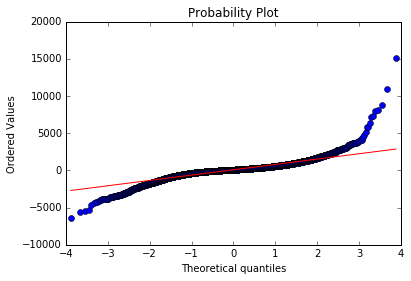

In [42]:
stats.probplot(predicts1-predicts2, dist="norm", plot=pylab)

In [43]:
print "Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(predicts1 - predicts2)

Shapiro-Wilk normality test, W-statistic: 0.843868, p-value: 0.000000


In [44]:
stats.ttest_rel(predicts1, predicts2)

Ttest_relResult(statistic=12.745056775182045, pvalue=5.4286548181791198e-37)

In [ ]:
# Q-6 p<a

In [49]:
conf = DescrStatsW(predicts1 - predicts2).tconfint_mean()
print("95%% confidence interval: [{}, {}]".format(conf[0], conf[1]))

95%% confidence interval: [72.4972656501, 98.8497702563]


In [51]:
# Q-7 - 70